#Example Using n-APMO#

###Author:###
    Fernando Posada
    Quantum and Chemistry Group, Universidad Nacional de Colombia, 2015

In [1]:
%matplotlib inline
from __future__ import division

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

##Molecule test##

This module is intented to load a molecular system.

* The stament ``molecule = MolecularSystem()`` will create a ``molecule`` object.
* ``molecule.add_atom`` will add a new atom in the molecule. You can add not only atoms, but particles as muons, positrons, etc.

In [2]:
from napmo.system.molecular_system import MolecularSystem

In [3]:
molecule = MolecularSystem()
molecule.add_atom('H', [0.000000, 0.000000, 0.370000])
molecule.add_atom('H', [0.000000, 0.000000, -0.370000])
molecule.show()

Object: MolecularSystem
------------------------------------------------------------------
AtomicElement :  atoms  number of e-:  2
Symbol  Z     origin (Bohr)                            Basis-set 
H       1     [ 0.          0.          0.69919862]    None      
H       1     [ 0.          0.         -0.69919862]    None      
------------------------------------------------------------------


##Radial Distribution##

In [4]:
from napmo.grids.radial import RadialGrid

In Becke integration the molecules are modeled as spherical grids. Each Integral is discretized in that grid. The corresponding weights are calculated taking into account the size of the atom and the singularity in the nucleus. 

To build the grid one need to specify the quadrature points in the sphere (I will talk about it later) and the radial quadrature points.  Following the paper of Becke, 1988, and Jorda, 1992. I decided to use Gauss-Chebyshev points because those are given by analytical formulas.

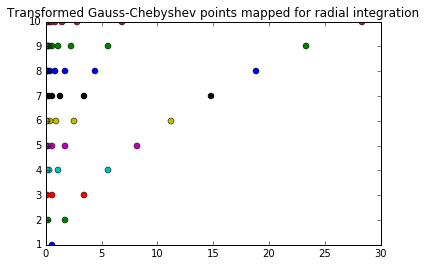

In [5]:
for p in range(1,11):
    rq = RadialGrid(p, 'H')
    plt.title('Transformed Gauss-Chebyshev points mapped for radial integration')
    plt.plot(rq.points, (rq.points*0)+p, 'o')


##Angular distribution##

In [6]:
from napmo.grids.angular import AngularGrid
from scipy.spatial import ConvexHull

For Angular distribution (quadrature points on the sphere) I use the quadrature formulas published by Lebedev, 1980. In these formulas all spherical harmonics of order up to  ``l=35`` are integrated exactly.

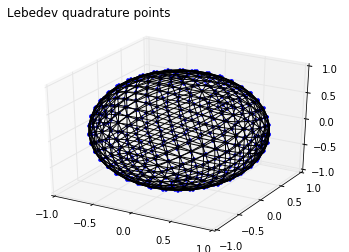

In [7]:
ag = AngularGrid(590) # lq is in spherical coordinates!

x = ag.points[:,0]
y = ag.points[:,1]
z = ag.points[:,2]

# plotting

points = np.array([x, y, z])
points = points.T

hull = ConvexHull(points)

edges = set()
for simplex in hull.simplices:
    edges.add(frozenset([simplex[0], simplex[1]]))
    edges.add(frozenset([simplex[1], simplex[2]]))
    edges.add(frozenset([simplex[2], simplex[0]]))
edges = [(a, b) for [a, b] in edges]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Lebedev quadrature points', loc='left')
ax.plot(x, y, z, '.')

for a, b in edges:
    p1 = hull.points[a]
    p2 = hull.points[b]
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='black')

## Becke grids and weights ##

In [8]:
from napmo.grids.becke import BeckeGrid
from napmo.data.constants import *

This algorithm is the implementation published in Becke, 1988.


In [9]:
angularPoints = 590
radialPoints = 2

grid = BeckeGrid(molecule, radialPoints,angularPoints)


### Becke weights test

It is supposed that $\sum_n w_n(r) = 1$. In the next calculation it can be seen that this is true for a H2 molecule were $r = 0$ means the center of the molecule and as expected $w_n = 0.5$.

Testing $w_n$

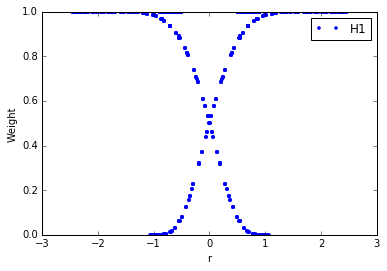

In [10]:
# The following code is to print out some "repesentation" of the grids.
plt.plot(grid.points[:,2], grid.becke_weights, '.', label='H1')
    
plt.xlabel('r')
plt.ylabel('Weight')
plt.legend()

In the following plot is shown the spherical grids and its nuclear weight in color scale. It can be seen that the value of the weigth changes with the proximity of another atom inside of the molecule. Even if the grids are overlaped the weight of the point r of atom A is zero in the proximity of atom B.

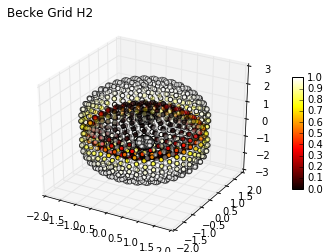

In [11]:
fig_grids = plt.figure()
bx = fig_grids.add_subplot(111, projection='3d')
bx.set_title('Becke Grid H2', loc='left')

aux = bx.scatter(grid.points[:,0], grid.points[:,1], grid.points[:,2], c=grid.becke_weights, cmap=plt.hot())
    
fig_grids.colorbar(aux, shrink=0.5, aspect=10)